In [1]:
#@title Version 1.3 <br> 3rd training of the model

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
from os import listdir
from os.path import isfile, join
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!mkdir dataset
!ls

dataset  drive	sample_data


In [5]:

!cp '/content/drive/MyDrive/datasets/LanguageDataset/final_changes/final_dataset_3.csv' /content/dataset/
! echo copied final_dataset_3


copied final_dataset_3


In [6]:
data = pd.read_csv('/content/dataset/final_dataset_3.csv')
data

,Language,Source
0,bash,foo a1 b2 b3 b4 ...\n\n
1,bash,unset\na\nb\nc\nMY_VARIABLE\nmake foo\nexport ...
2,bash,SUCCESS=false\nDEPLOY_PATH=/apps/jboss/server/...
3,bash,.bashrc\nhas_gitbranch() {\n if [ -e .git ]; ...
4,bash,foo foo scaffold_7 1 4845 6422 4845\...
...,...,...
44995,swift,@protocol ALAdLoadDelegate <NSObject>\n-(void)...
44996,swift,"func tableView(tableView: UITableView!, didSel..."
44997,swift,"override func touchesBegan(touches: NSSet, wi..."
44998,swift,override func viewDidLoad()\n{\n super.view...


Text(0.5, 1.0, 'Dataset')

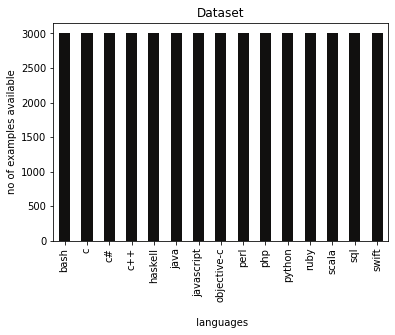

In [7]:
data.groupby('Language')['Source'].count().plot.bar(ylim=0,grid=False,color='#11100f')
plt.xlabel('\n languages')
plt.ylabel('no of examples available')
plt.title('Dataset')

### PREPROCESSING OF DATASET USING REGULAR EXPRESSION AND NLTK

In [8]:
import re
import nltk

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

nltk.download('stopwords')
nltk.download('punkt')
print('.....done')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
.....done


In [9]:
stopwords_list = stopwords.words('english')
print(len(stopwords_list))
stopwords_list.extend(['left','right','up','down','center','centre'])
print(len(stopwords_list))
stopwords_list.extend(['bottom','start','end','price','location','fix','here'])
print(len(stopwords_list))


179
185
192


In [10]:
def expression1(text):
    # remove single character

    #removing url 
    text = re.sub(r"http\S+", "", text)
    text = re.sub(r'^https?://.*[\r\n]*', '', text, flags=re.MULTILINE)
    text = re.sub(r'^http?://.*[\r\n]*', '', text, flags=re.MULTILINE)
    text = re.sub(r'^www?://.*[\r\n]*', '', text, flags=re.MULTILINE)

    text = ' '.join(['' if len(i)==1 else i for i in text.split()])
    
    # text = re.sub('{','',text)
    # text = re.sub('}','',text)
    
    # to remove '(' , ' )' , '[' , ']' ... replaced with a space 
    # text = re.sub('\\(',' ',text)
    # text = re.sub('\\)',' ',text)
    # text = re.sub('\\[',' ',text)
    # text = re.sub('\\]',' ',text)
    # replace . with a space
    # text = re.sub('\\.',' ',text)
    
    # remove unicode
    
    text = re.sub(r'(\\u[0-9A-Fa-f]+)',r'', text)       
    text = re.sub(r'[^\x00-\x7f]',r'',text)
    
    # remove digits
    text = re.sub('[0-9]',' ',text)
    
    #     remove + - * / < >
    text = re.sub('\\+',' ',text)
    text = re.sub('\\=',' ',text)
    text = re.sub('\\-',' ',text)
    text = re.sub('\\*',' ',text)
    text = re.sub('\\/',' ',text)
    # text = re.sub('\\<',' ',text)
    # text = re.sub('\\>',' ',text)
#     text = re.sub('\\:',' ',text)
    
#     text = text.replace(':',r' : ')
    
    
    #     text = ' '.join(text.split())

    # replace single chars again 
    text = ' '.join(['' if len(i)==1 else i for i in text.split()])
    
    # spacing quoted statement
    text = re.sub('"',' " ',text)
    # replace url

    text = re.sub('((www\.[^\s]+)|(https?://[^\s]+))',' ',text)
        #Replaces url address with "url" 
    # text = re.sub('((www\.[^\s]+)|(https?://[^\s]+))',' ',text)
	  # text = re.sub(r'#([^\s]+)', r'\1',text)

    return text

# def replaceURL(text):

def clean_code(text):
  text = expression1(text)
  text_tokens = word_tokenize(text)
  tokens_without_stopwords = [word for word in text_tokens if not word in stopwords_list] 
  # stopwords.words()]
  return ' '.join(tokens_without_stopwords)

print("TRY expresion1")

TRY expresion1


In [11]:
%%time

line_7210 = data.iloc[32710]['Source']
cleaned_7210 =  clean_code(line_7210)

print(line_7210 , '\n ->',len(line_7210))
print('-'*60,'\n\n')
print(cleaned_7210,'\n ->',len(cleaned_7210))


urllib.urlretrieve
urllib.urlretrieve('http://google.com/abc.jpg', 'abc.jpg')

abc.jpg
httplib.HTTPMessage
 
 -> 107
------------------------------------------------------------ 


urllib.urlretrieve urllib.urlretrieve ( ' 'abc.jpg ' ) abc.jpg 
 -> 62
CPU times: user 10.9 ms, sys: 2.35 ms, total: 13.2 ms
Wall time: 20.1 ms


In [12]:
%%time

dataset_refined = data.copy()
print('->created a copy')
dataset_refined['Source'] =  dataset_refined['Source'].astype(str)
print('\n->as string')
dataset_refined['Source'] =  dataset_refined['Source'].apply(clean_code)
print('\n->cleaned code with expression1')
dataset_refined.to_csv('dataset/cleaned_data_3_v2.csv',index=None)
print('\n->saved cleaned csv , columns : ',dataset_refined.columns)

print('done')

->created a copy

->as string

->cleaned code with expression1

->saved cleaned csv , columns :  Index(['Language', 'Source'], dtype='object')
done
CPU times: user 36.7 s, sys: 56.4 ms, total: 36.8 s
Wall time: 36.8 s


In [13]:
df = pd.read_csv('/content/dataset/cleaned_data_3_v2.csv')
df

,Language,Source
0,bash,foo ...
1,bash,unset MY_VARIABLE make foo export MY_VARIABLE ...
2,bash,SUCCESS false DEPLOY_PATH apps jboss server de...
3,bash,.bashrc has_gitbranch ( ) .git ] ; GIT_BRANCH ...
4,bash,foo foo scaffold_ bar bar scaffold_ awk ' { ( ...
...,...,...
44995,swift,@ protocol ALAdLoadDelegate < NSObject > ( voi...
44996,swift,"func tableView ( tableView : UITableView ! , d..."
44997,swift,"override func touchesBegan ( touches : NSSet ,..."
44998,swift,override func viewDidLoad ( ) super.viewDidLoa...


In [14]:
%%time

df["lang_id"] = df['Language'].factorize()[0]
print('>>> lang id created')
lang_id_df = df[['Language', 'lang_id']].drop_duplicates().sort_values('lang_id')
print('>>> added to dataframe')
lang_to_id = dict(lang_id_df.values)
id_to_lang = dict(lang_id_df[['lang_id', 'Language']].values)
print('>>> now columns : ',df.columns)

>>> lang id created
>>> added to dataframe
>>> now columns :  Index(['Language', 'Source', 'lang_id'], dtype='object')
CPU times: user 12.5 ms, sys: 992 µs, total: 13.5 ms
Wall time: 17.7 ms


In [15]:
df

,Language,Source,lang_id
0,bash,foo ...,0
1,bash,unset MY_VARIABLE make foo export MY_VARIABLE ...,0
2,bash,SUCCESS false DEPLOY_PATH apps jboss server de...,0
3,bash,.bashrc has_gitbranch ( ) .git ] ; GIT_BRANCH ...,0
4,bash,foo foo scaffold_ bar bar scaffold_ awk ' { ( ...,0
...,...,...,...
44995,swift,@ protocol ALAdLoadDelegate < NSObject > ( voi...,14
44996,swift,"func tableView ( tableView : UITableView ! , d...",14
44997,swift,"override func touchesBegan ( touches : NSSet ,...",14
44998,swift,override func viewDidLoad ( ) super.viewDidLoa...,14


#### Copy and load tokenizer

In [16]:
!cp '/content/drive/My Drive/datasets/LanguageDataset/final_changes/DL_models/tokenizer_model1_run2.pickle' '/content/dataset'
!echo done

done


In [17]:
%%time

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import pickle

vocab_size = 10000
trunc_type='post'
oov_tok = "<OOV>"

print('loading pickle')
# loading
with open('/content/dataset/tokenizer_model1_run2.pickle', 'rb') as handle:
    tokenizer = pickle.load(handle)

print('loaded',type(tokenizer))

loading pickle
loaded <class 'keras_preprocessing.text.Tokenizer'>
CPU times: user 1.39 s, sys: 158 ms, total: 1.55 s
Wall time: 1.56 s


In [18]:
tokenizer

In [19]:
word_index = tokenizer.word_index
print('len of word index',len(word_index)) # should be 80436

len of word index 80436


In [20]:
max_length = 1000
trunc_type='post'

### transform sentences using tokenizer

In [21]:
%%time
print('converting whole data')
X = tokenizer.texts_to_sequences(df['Source'].values.astype('U'))
print(' .... converted text to sequences' , type(X),'\n ')
print('-'*70)

converting whole data
 .... converted text to sequences <class 'list'> 
 
----------------------------------------------------------------------
CPU times: user 5.69 s, sys: 1.74 s, total: 7.43 s
Wall time: 7.43 s


In [22]:
%%time
X_padded = pad_sequences(X,maxlen=max_length, truncating=trunc_type)
print('sequence padded')
print(type(X_padded),'\n padded to ',X_padded.shape)

sequence padded
<class 'numpy.ndarray'> 
 padded to  (45000, 1000)
CPU times: user 406 ms, sys: 2.79 ms, total: 409 ms
Wall time: 411 ms


### Preparing labels

In [23]:
Y = pd.get_dummies(df['Language'].values.astype('U'))
print('and Y : ',type(Y))
y = np.asarray(Y)
print(X_padded.shape , y.shape)

and Y :  <class 'pandas.core.frame.DataFrame'>
(45000, 1000) (45000, 15)


### Train Test Split

In [24]:
from sklearn.model_selection import train_test_split


In [25]:
%%time
X_train, X_test, y_train, y_test = train_test_split( X_padded, y, test_size=0.33, random_state=42)

print('training data : ',X_train.shape , ' ... ', y_train.shape)
print('testing data : ',X_test.shape , ' ... ', y_test.shape)

training data :  (30150, 1000)  ...  (30150, 15)
testing data :  (14850, 1000)  ...  (14850, 15)
CPU times: user 62.4 ms, sys: 68 µs, total: 62.5 ms
Wall time: 64.4 ms


### Copying and loading model

In [27]:
!cp '/content/drive/My Drive/datasets/LanguageDataset/final_changes/DL_models/final_DLModel1_run2_training2.zip' '/content/dataset'
!echo copied

copied


#### unzip

In [28]:
!unzip '/content/dataset/final_DLModel1_run2_training2.zip'


Archive:  /content/dataset/final_DLModel1_run2_training2.zip
   creating: content/content/final_DLModel1_run2_training2/
  inflating: content/content/final_DLModel1_run2_training2/saved_model.pb  
   creating: content/content/final_DLModel1_run2_training2/assets/
   creating: content/content/final_DLModel1_run2_training2/variables/
  inflating: content/content/final_DLModel1_run2_training2/variables/variables.index  
  inflating: content/content/final_DLModel1_run2_training2/variables/variables.data-00000-of-00001  


In [29]:
model_path = '/content/content/content/final_DLModel1_run2_training2'


### loading the model

In [30]:
%%time

from keras.models import load_model

model = load_model(model_path)
print('loaded')

loaded
CPU times: user 1.58 s, sys: 479 ms, total: 2.06 s
Wall time: 6.66 s


In [31]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 1000, 32)          320000    
_________________________________________________________________
conv1d (Conv1D)              (None, 996, 128)          20608     
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 199, 128)          0         
_________________________________________________________________
batch_normalization (BatchNo (None, 199, 128)          512       
_________________________________________________________________
activation (Activation)      (None, 199, 128)          0         
_________________________________________________________________
global_average_pooling1d (Gl (None, 128)               0         
_________________________________________________________________
dropout (Dropout)            (None, 128)               0

In [33]:
from sklearn.model_selection import KFold

# n_fold = 2
# n_fold = 3 
# n_fold = 5
n_fold = 10

k_fold = KFold(n_fold,shuffle=True,random_state=42)

In [34]:
k_fold


KFold(n_splits=10, random_state=42, shuffle=True)

In [35]:
%%time

scores = []
histories = []
print('......... fitting the model\n')

for train_iX,test_iX in k_fold.split(X_train):
  # selecting rows for trainX and trainY first train data and then cross validation data
  x_itrain,y_itrain,x_cv,y_cv = X_train[train_iX] , y_train[train_iX] , X_train[test_iX], y_train[test_iX]
    # fit into model with batch sizes of 32 and epochs 10
    # # history = my_model.fit(x_train,y_train,batch_size=32,epochs=10,verbose=1,validation_data=(x_cv,y_cv))
  history = model.fit(x_itrain,y_itrain,batch_size=64,epochs=10,verbose=1,validation_data=(x_cv,y_cv))
  # evaluate model
  loss,acc = model.evaluate(X_test , y_test,verbose=2)
  print('-'*80)
  print('\n\t --> accuracy on test data : {:.6f}% and loss : {:.7f} <--\n'.format(acc * 100.0,loss))
  print('-'*80)
    # # stores scores  
  scores.append(acc)
  histories.append(history)

print('done')

......... fitting the model

Epoch 1/10
424/424 [==============================] - 22s 33ms/step - loss: 2.3022 - accuracy: 0.6615 - val_loss: 2.2667 - val_accuracy: 0.7363
Epoch 2/10
424/424 [==============================] - 13s 32ms/step - loss: 2.2995 - accuracy: 0.6666 - val_loss: 2.2660 - val_accuracy: 0.7207
Epoch 3/10
424/424 [==============================] - 10s 24ms/step - loss: 2.2977 - accuracy: 0.6688 - val_loss: 2.2673 - val_accuracy: 0.7347
Epoch 4/10
424/424 [==============================] - 12s 27ms/step - loss: 2.2966 - accuracy: 0.6673 - val_loss: 2.2628 - val_accuracy: 0.7277
Epoch 5/10
424/424 [==============================] - 12s 29ms/step - loss: 2.2942 - accuracy: 0.6719 - val_loss: 2.2607 - val_accuracy: 0.7343
Epoch 6/10
424/424 [==============================] - 14s 33ms/step - loss: 2.2922 - accuracy: 0.6701 - val_loss: 2.2620 - val_accuracy: 0.7347
Epoch 7/10
424/424 [==============================] - 13s 31ms/step - loss: 2.2911 - accuracy: 0.6750 - val

### Saving the model

In [36]:
print('saving model...')
model.save('content/final_DLModel1_run2_training3')
print('saved')

saving model...
INFO:tensorflow:Assets written to: content/final_DLModel1_run2_training3/assets
saved


In [37]:
!zip -r /content/final_DLModel1_run2_training3.zip /content/content/final_DLModel1_run2_training3

  adding: content/content/final_DLModel1_run2_training3/ (stored 0%)
  adding: content/content/final_DLModel1_run2_training3/saved_model.pb (deflated 89%)
  adding: content/content/final_DLModel1_run2_training3/assets/ (stored 0%)
  adding: content/content/final_DLModel1_run2_training3/variables/ (stored 0%)
  adding: content/content/final_DLModel1_run2_training3/variables/variables.index (deflated 68%)
  adding: content/content/final_DLModel1_run2_training3/variables/variables.data-00000-of-00001 (deflated 14%)


### Saved to Drive

In [38]:
!cp '/content/final_DLModel1_run2_training3.zip' '/content/drive/My Drive/datasets/LanguageDataset/final_changes/DL_models'
!echo done

done


### Visualizing results

In [39]:
import seaborn as sns


In [40]:
def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues',
                          title=None):
    '''
    This function will make a pretty plot of an sklearn Confusion Matrix cm using a Seaborn heatmap visualization.
    Arguments
    ---------
    cf:            confusion matrix to be passed in
    group_names:   List of strings that represent the labels row by row to be shown in each square.
    categories:    List of strings containing the categories to be displayed on the x,y axis. Default is 'auto'
    count:         If True, show the raw number in the confusion matrix. Default is True.
    normalize:     If True, show the proportions for each category. Default is True.
    cbar:          If True, show the color bar. The cbar values are based off the values in the confusion matrix.
                   Default is True.
    xyticks:       If True, show x and y ticks. Default is True.
    xyplotlabels:  If True, show 'True Label' and 'Predicted Label' on the figure. Default is True.
    sum_stats:     If True, display summary statistics below the figure. Default is True.
    figsize:       Tuple representing the figure size. Default will be the matplotlib rcParams value.
    cmap:          Colormap of the values displayed from matplotlib.pyplot.cm. Default is 'Blues'
                   See http://matplotlib.org/examples/color/colormaps_reference.html
                   
    title:         Title for the heatmap. Default is None.
    '''


    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))

        #if it is a binary confusion matrix, show some more stats
        if len(cf)==2:
            #Metrics for Binary Confusion Matrices
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(
                accuracy,precision,recall,f1_score)
        else:
            stats_text = "\n\nAccuracy={:0.3f}".format(accuracy)
    else:
        stats_text = ""


    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('True label')
        plt.xlabel('Predicted label' + stats_text)
    else:
        plt.xlabel(stats_text)
    
    if title:
        plt.title(title)

In [41]:
class_names = df['Language'].unique()
class_names

array(['bash', 'c', 'c#', 'c++', 'haskell', 'java', 'javascript',
       'objective-c', 'perl', 'php', 'python', 'ruby', 'scala', 'sql',
       'swift'], dtype=object)

In [42]:
y_test.shape

(14850, 15)

In [45]:
actual_pred = np.argmax(y_test,axis=1)
actual_pred , actual_pred.shape

(array([12,  3, 14, ...,  7,  6,  0]), (14850,))

In [46]:
X_test.shape

(14850, 1000)

In [47]:
predictions = model.predict(X_test)

In [48]:
prediction_by_model = np.argmax(predictions,axis=1)
prediction_by_model , prediction_by_model.shape

(array([12,  3, 14, ...,  7,  6,  0]), (14850,))

#### confusion matrix

In [49]:
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

In [50]:
cnf_matrix = confusion_matrix(actual_pred, prediction_by_model)
cnf_matrix

array([[807,  15,   4,   3,  13,  45,  17,   2,  31,  30,  13,  22,   3,
         18,   5],
       [ 21, 749,   7,  88,  23,  37,   6,   2,  18,  18,  17,  13,   2,
          8,   3],
       [  6,  21, 735,  33,   9,  79,  27,   5,  11,  20,   7,  14,   7,
         32,  11],
       [ 13, 106,  36, 645,  18,  56,   7,   7,   4,   9,  15,  17,   4,
          6,   5],
       [ 11,  31,  14,  21, 798,  43,   5,   0,  10,  14,  17,  11,  13,
          9,  13],
       [ 12,  10, 105,  22,  12, 660,  16,  10,  14,  13,  16,  21,  17,
         24,   0],
       [  6,   4,  37,   3,   5,  38, 788,   4,  16,  34,  10,  25,   4,
         21,   7],
       [  7,  30,  11,  21,   1,  49,   6, 780,   8,   7,   5,  11,   2,
         10,  10],
       [ 76,  18,  27,  12,  11,  58,  16,   4, 635,  34,  28,  38,   5,
         20,   3],
       [ 49,  13,  26,   2,  11,  54,  71,   2,  29, 649,  17,  22,   0,
         60,   1],
       [ 24,  22,  16,  16,  19,  61,  16,   9,  31,  43, 715,  34,  19,
       

In [51]:
target_names = [class_names[i] for i in range(15)]
print(target_names ,'\n\n' , type(target_names))

['bash', 'c', 'c#', 'c++', 'haskell', 'java', 'javascript', 'objective-c', 'perl', 'php', 'python', 'ruby', 'scala', 'sql', 'swift'] 

 <class 'list'>


CPU times: user 150 ms, sys: 5.08 ms, total: 155 ms
Wall time: 155 ms


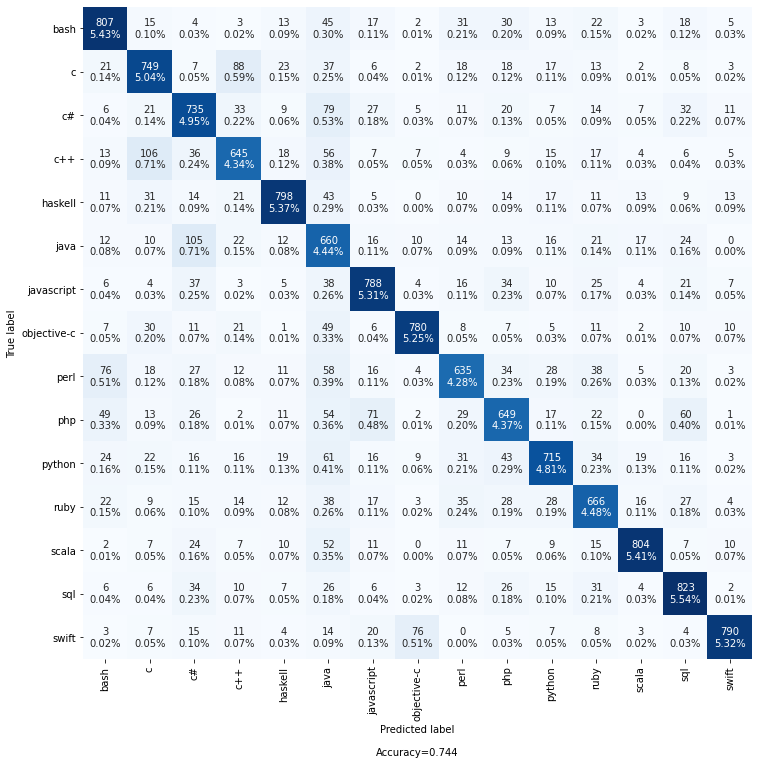

In [52]:
%%time
make_confusion_matrix(cnf_matrix, figsize=(12,12), cbar=False ,categories=target_names)
